In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
# preparing features for training

def extract_code(s):
    s = s.split("/mini_")[-1]
    pdb_code = s.split("_")[0]
    lig_code = s.split("_chain")[1].split("_")[1]
    return (pdb_code + "_" + lig_code).upper()

actives = pd.read_csv("vscreenml_features_actives.csv")
actives["Class"] = 1

decoys = pd.read_csv("vscreenml_features_decoys.csv")
decoys["Class"] = 0

data = pd.concat([actives, decoys])
data = data[data["InteractionScore"] < 0]
data = data[data["VdwSA"] != "None"]

data["PDB_code"] = data["name"].apply(lambda x: extract_code(x))

discard_codes = data.groupby("PDB_code")["Class"].count().reset_index()
discard_codes = discard_codes[discard_codes["Class"] != 4]

data = data[~data["PDB_code"].isin(discard_codes["PDB_code"])]

data.to_csv("vscreenml_dude.csv", index=False)

In [199]:
data = pd.read_csv("vscreenml_dude.csv")
data

,name,TotalExposedSasa,TotalBSA,InterfaceHydrophobicSasa,InterfacePolarSasa,InteractionScore,FaAtrInteraction,FaRepInteraction,FaSolInteraction,FaElecInteraction,...,16.35,16.53,FCsp3,NumHAcceptors,NumHDonors,MolLogP,TPSA,VdwSA,Class,PDB_code
0,actives_best/mini_1a28_model0_chainB_STR_resi2...,-0.184006,701.40,0.846446,0.153554,-36.068202,-37.320399,12.820609,-1.920443,-2.179053,...,0,0,0.809524,2,0,4.72350,34.14,395.795291,1,1A28_STR
1,actives_best/mini_1a6v_model0_chainH_NPC_altA_...,-0.051948,594.80,0.636849,0.363151,-23.787337,-25.501940,4.720431,6.557934,-3.280293,...,0,0,0.428571,4,4,1.49550,126.94,380.675742,1,1A6V_NPC
2,actives_best/mini_1a9u_model0_chainA_SB2_resi8...,-0.021132,647.20,0.741420,0.258580,-30.784102,-30.858528,9.346084,3.316231,-4.277781,...,0,0,0.047619,3,1,4.68220,58.64,433.574413,1,1A9U_SB2
3,actives_best/mini_1afe_model0_chainH_ALZ_resi6...,-0.137664,796.50,0.567200,0.432800,-27.897997,-33.246864,5.727228,13.372526,-3.956453,...,0,0,0.529412,5,3,1.14730,96.69,452.601755,1,1AFE_ALZ
4,actives_best/mini_1aj7_model0_chainH_NPE_resi2...,-0.079367,589.80,0.733329,0.266671,-27.770962,-33.714508,10.640262,10.935087,-7.495546,...,0,0,0.363636,5,3,2.30530,124.14,338.284114,1,1AJ7_NPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,decoys_minimizations/mini_6eix_model0_chainA_A...,-0.177453,751.90,0.720695,0.279305,-23.391456,-27.453924,5.446906,2.798717,-0.486812,...,0,0,0.117647,5,2,3.07670,98.07,368.410127,0,6EIX_A3F
5340,decoys_minimizations/mini_6eix_model0_chainA_A...,-0.193231,786.10,0.697935,0.302065,-28.592686,-31.786562,7.689084,4.304022,-2.485702,...,0,0,0.111111,4,3,3.51000,95.18,378.934369,0,6EIX_A3F
5341,decoys_minimizations/mini_7gch_model0_chainG_L...,0.065020,486.61,0.557511,0.442489,-15.116973,-20.245702,4.334733,7.227810,-2.055199,...,0,0,0.357143,5,2,2.27502,67.52,365.752993,0,7GCH_LPF
5342,decoys_minimizations/mini_7gch_model0_chainG_L...,-0.037000,560.88,0.599370,0.400630,-20.004575,-26.571550,7.817489,8.653603,-2.304072,...,0,0,0.625000,4,2,2.65592,50.72,414.141334,0,7GCH_LPF


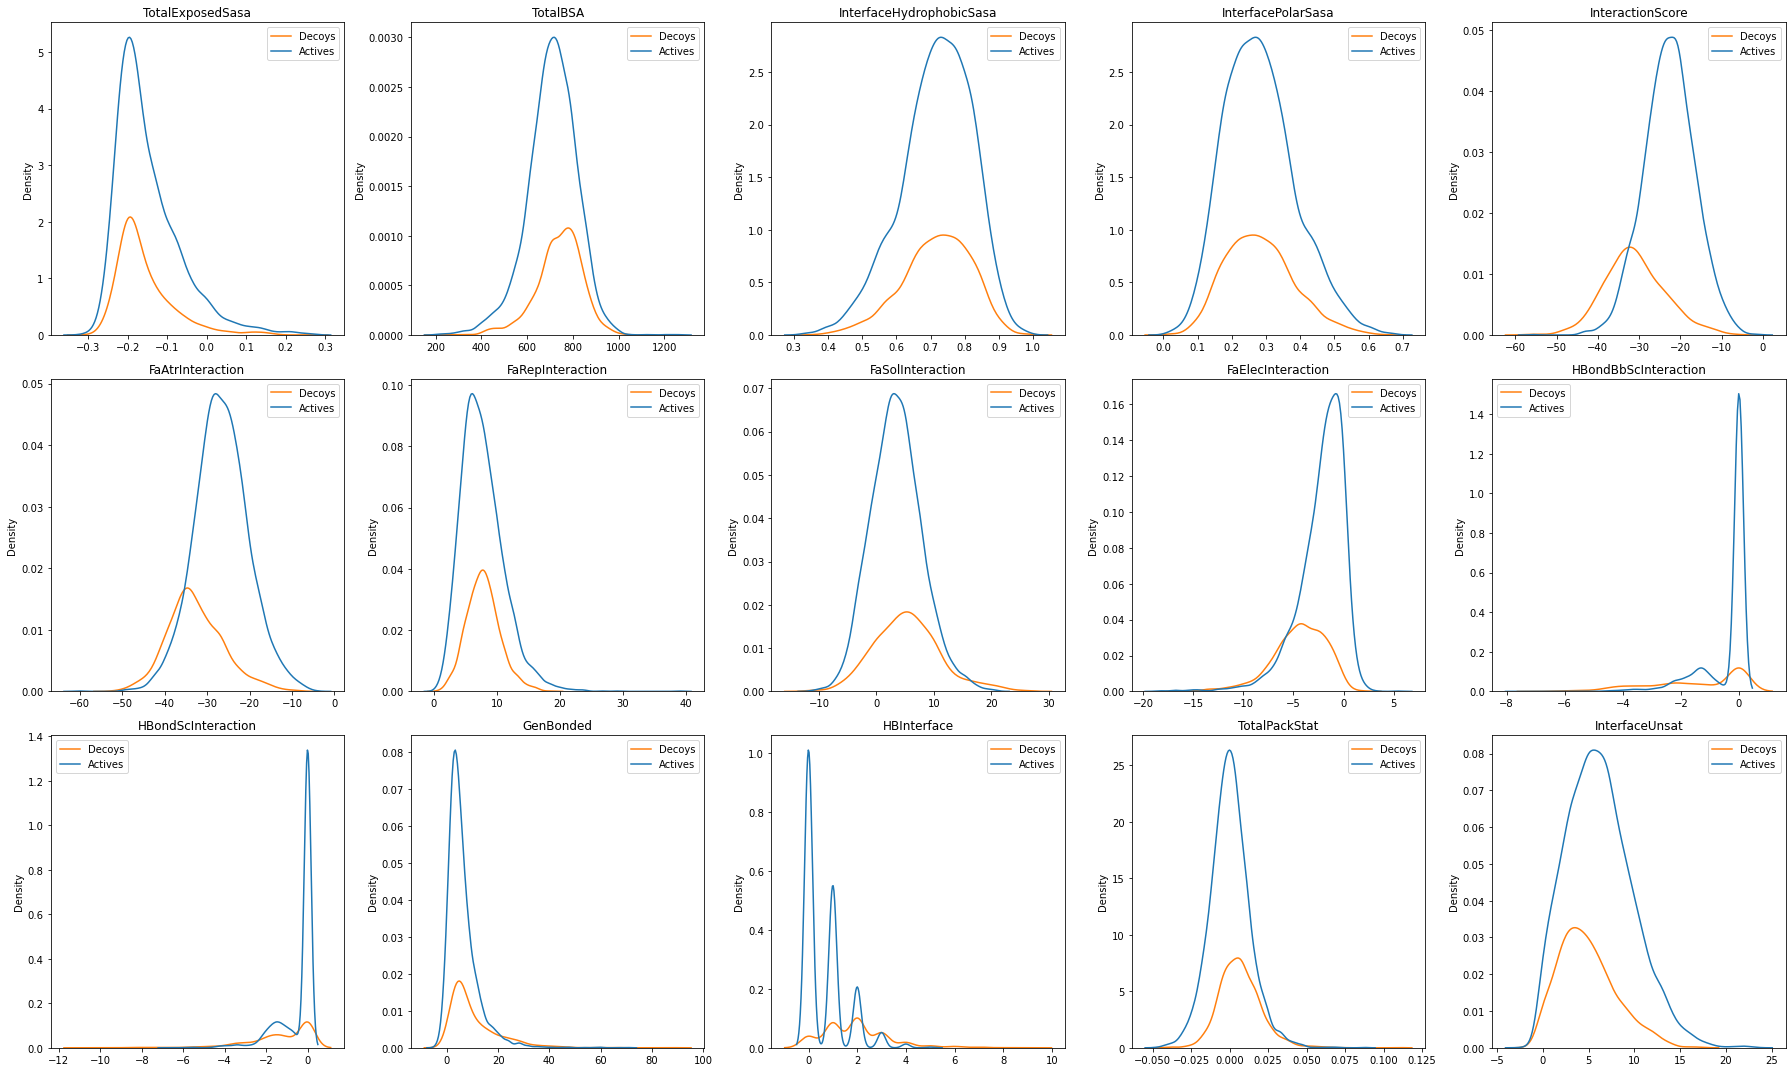

In [212]:
rosetta_features = data.columns[1:16]

fig, ax = plt.subplots(3,5, figsize=(25,15))

i,j = 0,0

for c in rosetta_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("Rosetta_FeaturesDistribution.png", dpi=100, facecolor="white")

/Users/andriag/Applications/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/andriag/Applications/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


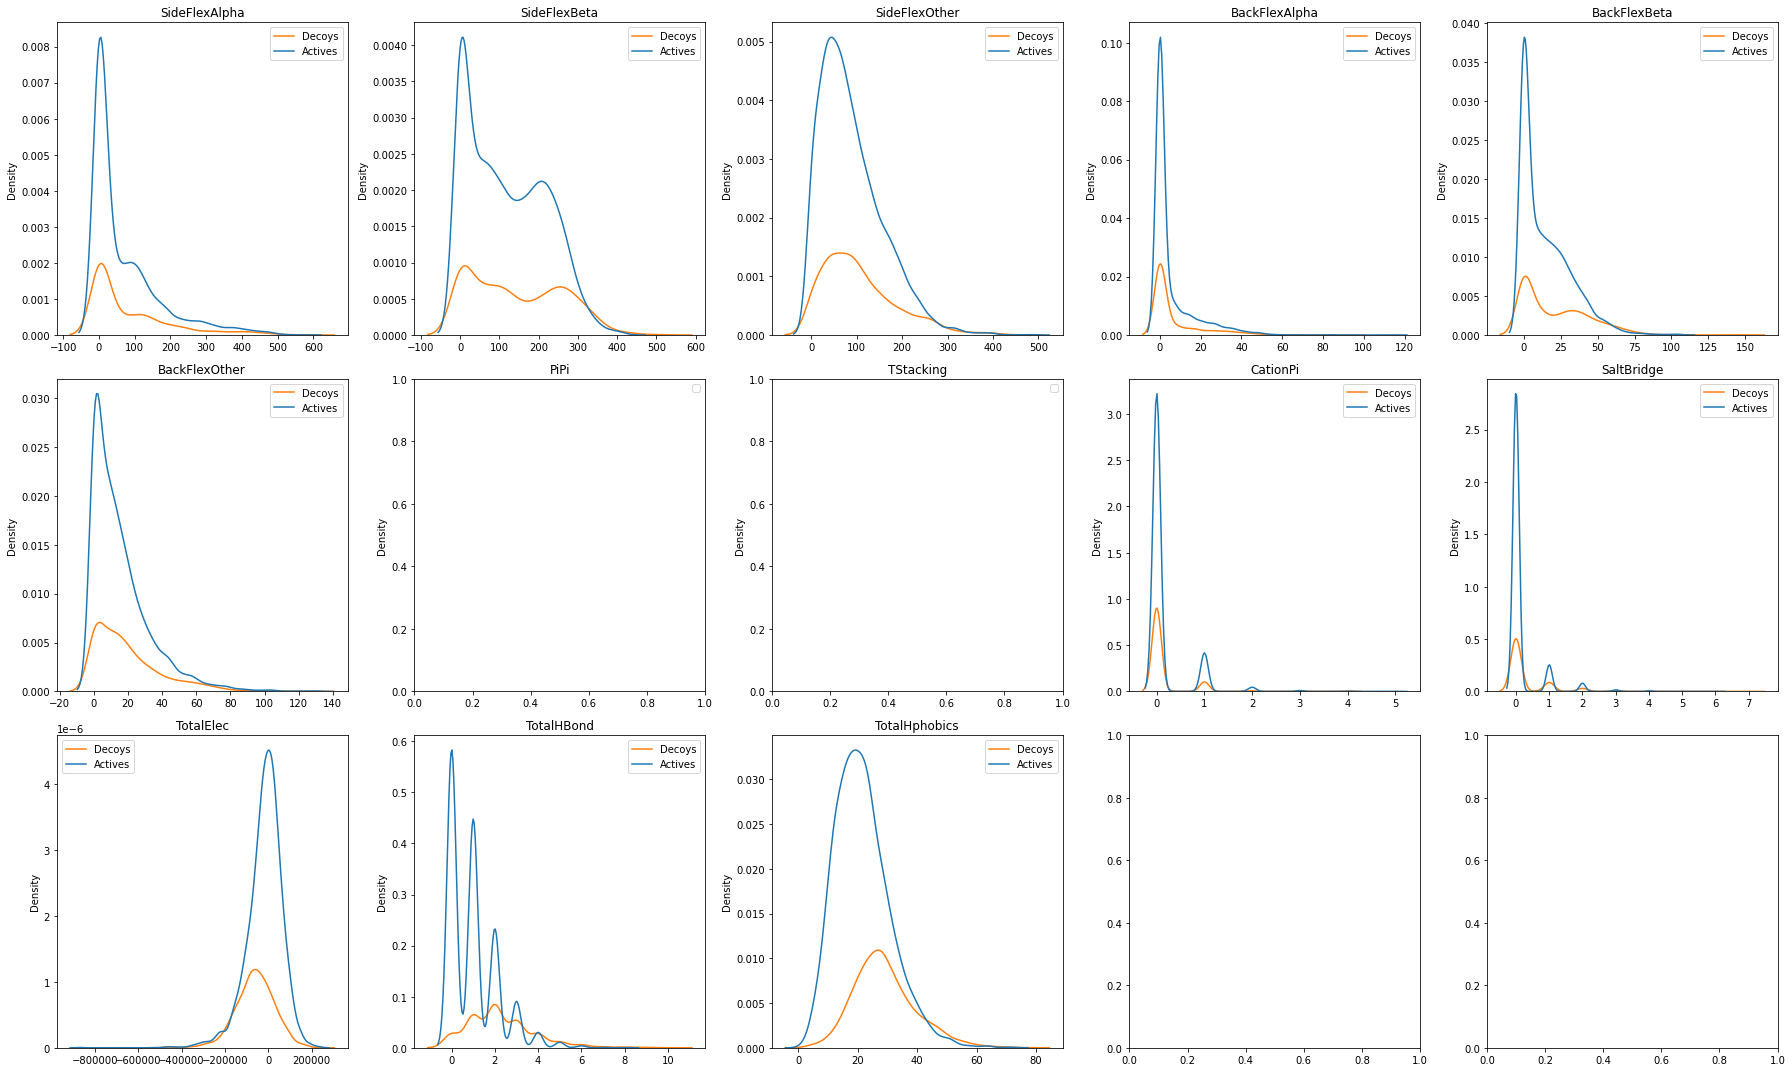

In [214]:
binana_features = data.columns[16:29]

fig, ax = plt.subplots(3,5, figsize=(25,15))

i,j = 0,0

for c in binana_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("Binana_FeaturesDistribution.png", dpi=100, facecolor="white")

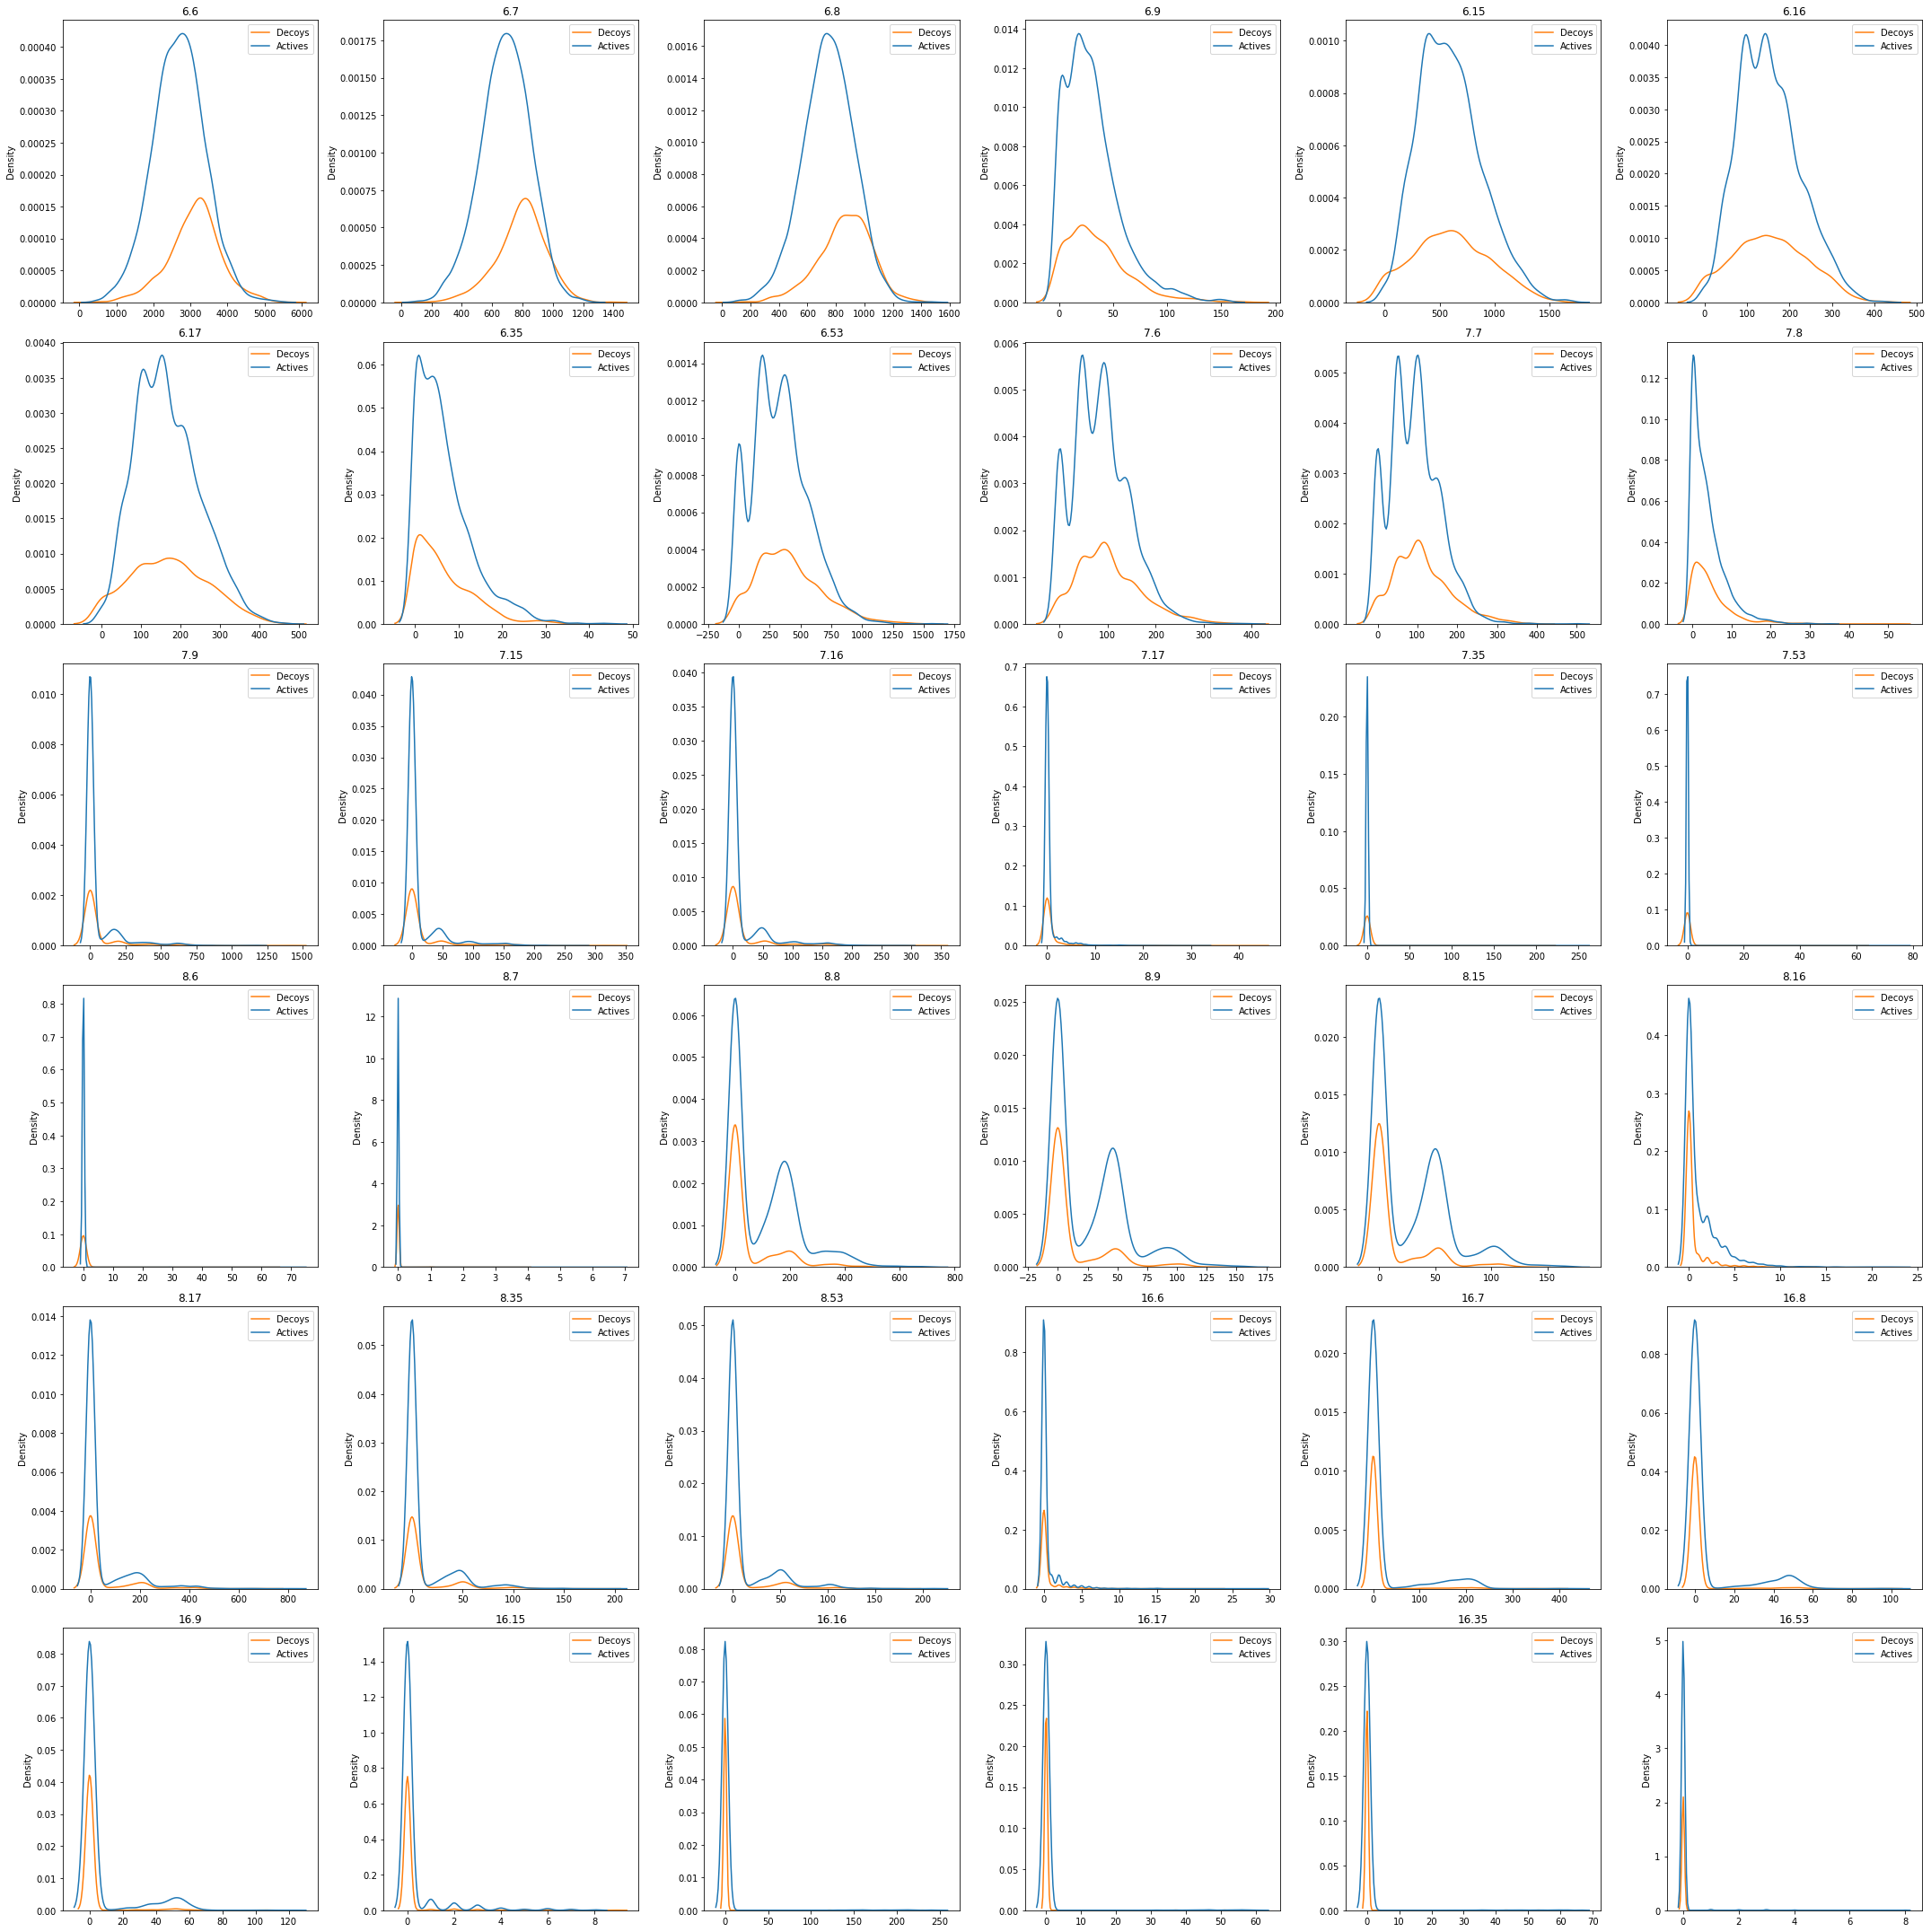

In [217]:
rf_features = data.columns[29:65]

fig, ax = plt.subplots(6,6, figsize=(30,30))

i,j = 0,0

for c in rf_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("RF_FeaturesDistribution.png", dpi=100, facecolor="white")

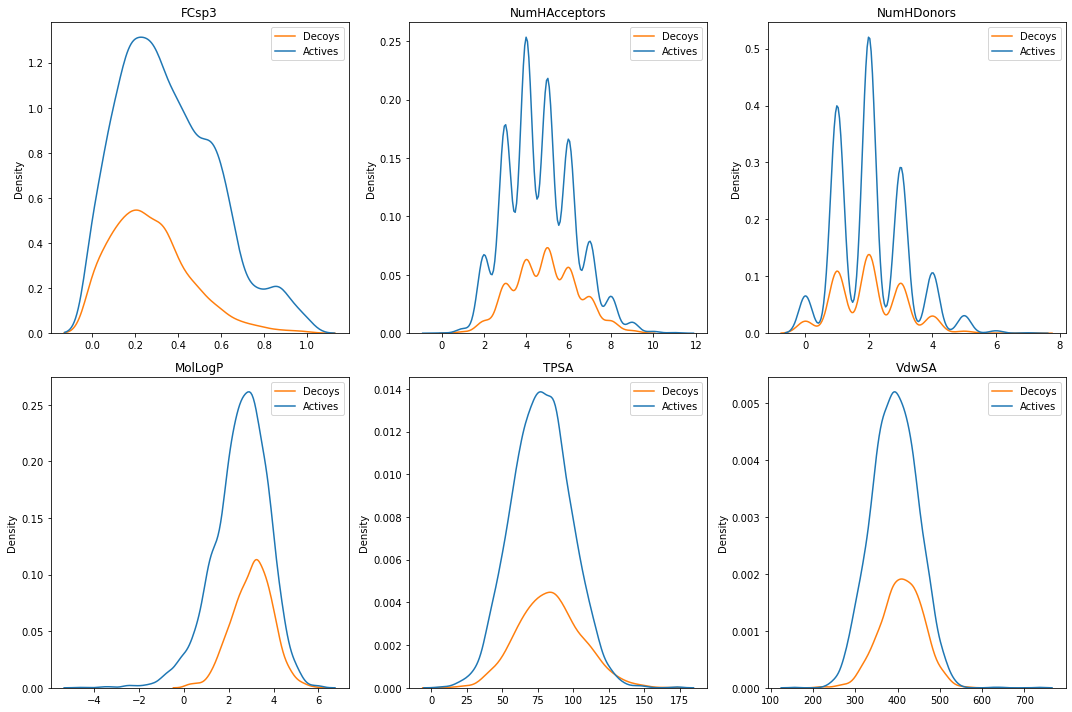

In [219]:
rdkit_features = data.columns[65:-2]
fig, ax = plt.subplots(2,3, figsize=(15,10))

i,j = 0,0

for c in rdkit_features:
    sns.kdeplot(x=c, hue="Class", data=data, ax=ax[i][j])
    ax[i][j].set_title(c)
    ax[i][j].set_xlabel("")
    ax[i][j].legend(labels=["Decoys", "Actives"])
    
    j+= 1
    
    if j == ax.shape[-1]:
        j = 0
        i += 1
    
fig.tight_layout()
fig.savefig("RDKit_FeaturesDistribution.png", dpi=100, facecolor="white")

In [166]:
import os, time, glob

for col in data.columns[1:-2]:
    
    os.system(f"rm -rf {col}; mkdir -p {col}")

    borders = data[data["Class"] == 1].groupby("Class")[col].agg(["idxmin","idxmax"]).to_dict()
    borders = [vv for v in borders.values() for vv in v.values()]

    for c in data.iloc[borders, :]["name"]:
        os.system(f"scp -r $fccc_host:~/2/{c} ./{col}")
        
    if len(glob.glob(f"{col}/*pdb")) != 2:
        time.sleep(30)
        for c in data.iloc[borders, :]["name"]:
            os.system(f"scp -r $fccc_host:~/2/{c} ./{col}")
        

kex_exchange_identification: Connection closed by remote host
Connection closed by 10.128.228.227 port 22
kex_exchange_identification: Connection closed by remote host
Connection closed by 10.128.228.227 port 22
kex_exchange_identification: Connection closed by remote host
Connection closed by 10.128.228.227 port 22
kex_exchange_identification: Connection closed by remote host
Connection closed by 10.128.228.227 port 22
kex_exchange_identification: banner line contains invalid characters
banner exchange: Connection to 10.128.228.227 port 22: invalid format
kex_exchange_identification: Connection closed by remote host
Connection closed by 10.128.228.227 port 22
kex_exchange_identification: Connection closed by remote host
Connection closed by 10.128.228.227 port 22
kex_exchange_identification: Connection closed by remote host
Connection closed by 10.128.228.227 port 22
